## DBSCAN Example:

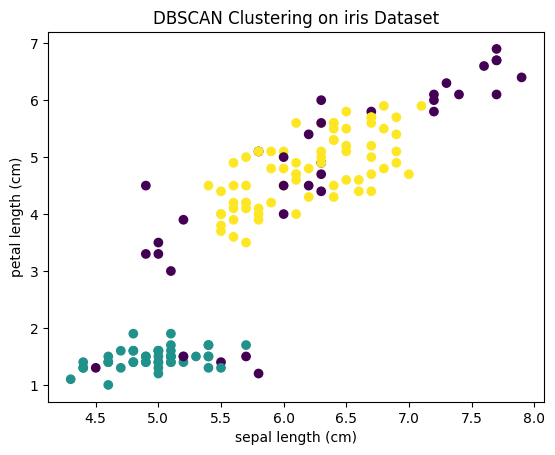

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris= load_iris()
X= iris.data

# Standard the data
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# Create the DBSCAN object
dbscan= DBSCAN(eps= .5, min_samples=5)

# Fit the model
dbscan.fit(X_scaled)

# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('DBSCAN Clustering on iris Dataset')
plt.show()

## Hyperparameter DBSCAN: 

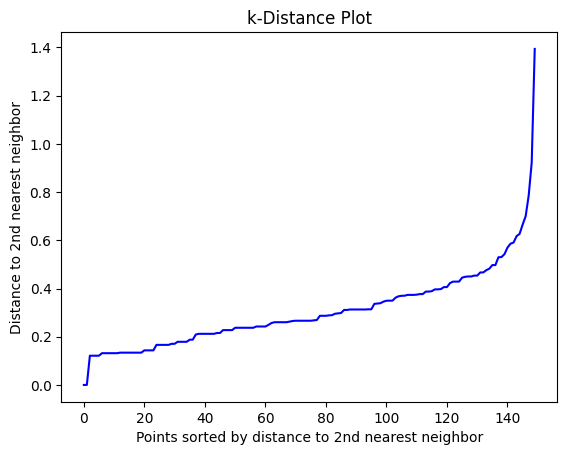

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the iris dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Find the nearest neighbors
neighbor = NearestNeighbors(n_neighbors=5)
nbrs = neighbor.fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances and select the 2nd nearest neighbor
sorted_distances = np.sort(distances[:, 1])  # Take the second nearest neighbor
x_values = np.arange(len(sorted_distances))  # Create x values for plotting

# Plot the k-distance plot
plt.plot(x_values, sorted_distances, linestyle='-', color='b')
plt.xlabel('Points sorted by distance to 2nd nearest neighbor')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('k-Distance Plot')
plt.show()

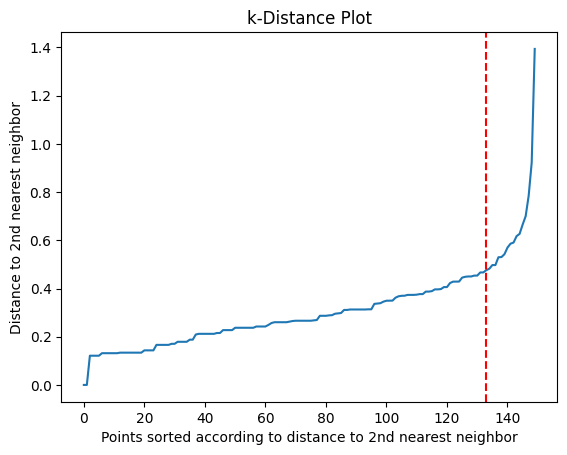

Suggest value of eps: 0.4760712736677158


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kneed import KneeLocator 

# Load the iris dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Find the nearest neighbors
neighbor = NearestNeighbors(n_neighbors=5)
nbrs = neighbor.fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances
sorted_distances = np.sort(distances, axis=0)
sorted_distances= sorted_distances[:, 1]

# Identify the 'elbow' in the k-distance plot
kneedle= KneeLocator(range(1, len(sorted_distances)+1), sorted_distances, S=1.0, curve='convex', direction='increasing')
elbow_index= kneedle.elbow

# Plot the k-distance plot
plt.plot(sorted_distances)
plt.xlabel('Points sorted according to distance to 2nd nearest neighbor')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('k-Distance Plot')

# Add the vertical line at the 'elbow' point
plt.axvline(x=elbow_index, color='r', linestyle='--')

plt.show()

# Print the values of 'eps'
print('Suggest value of eps:', sorted_distances[elbow_index])

## How to find the best num of MinPts:

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Load the dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Use the previously calculated 'eps' (from k-distance plot)
eps = 0.5  # Replace with your calculated value

# Define the range for 'minPts'
minPts_range = range(2, 11)  # Corrected to use parentheses

# Initialize the variable to store the best 'minPts' and the corresponding silhouette score
best_minpts = -1
best_silhouette = -float('inf')

# Grid search over the 'minPts' range
for minpts in minPts_range:
    dbscan = DBSCAN(eps=eps, min_samples=minpts)
    labels = dbscan.fit_predict(features)

    # Ignore execution if no clusters were found
    if len(np.unique(labels)) < 2 or (labels == -1).all():
        continue

    silhouette = silhouette_score(features, labels)
    print(f'minpts: {minpts}, silhouette_score: {silhouette}')

    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_minpts = minpts

# Print the best parameters found
print(f'Best minPts: {best_minpts}, with silhouette score: {best_silhouette}')

minpts: 2, silhouette_score: 0.1150059338947623
minpts: 3, silhouette_score: 0.15971036873870176
minpts: 4, silhouette_score: 0.36457435678297534
minpts: 5, silhouette_score: 0.35651648142700726
minpts: 6, silhouette_score: 0.1958665929942779
minpts: 7, silhouette_score: 0.1391483140504277
minpts: 8, silhouette_score: 0.18821743063720223
minpts: 9, silhouette_score: 0.06932089894577982
minpts: 10, silhouette_score: 0.009426257445526207
Best minPts: 4, with silhouette score: 0.36457435678297534
